# Übung

Nach DIN 1946-6 sind Türen mit einer Überströmöffnung zu versehen. Das ist erforderlich, damit die Luft auch bei geschlossenen Türen von den Zulufträumen zu den Ablufträumen strömen kann.

Die Überströmöffnung wird meist durch Kürzung des Türspalts um einen bestimmten Betrag sichergestellt. Nach DIN 1946-6 ist die folgende Tabelle einzuhalten:

Luftmenge<br>Tür mit Dichtung | $\frac{m^3}{h}$ | 10 | 20 | 30 | 40 | 50 | 60 | 70 | 80 | 90 | 100
------------------------------|-----------------|----|----|----|----|----|----|----|----|----|----
Überströmfläche               | $cm^2$          | 25 | 50 | 75 | 100|125 |150 |175 |200 | 225| 250
Kürzungsmaß                   | $mm$            |  3 |  6 |  8 | 11 | 14 | 17 | 20 | 22 | 25 | 28

- Berechnen Sie die lichten Breiten der Tür
- berechnen Sie die Strömungsgeschwindigkeiten $v$ der Luft im Türspalt,
- stellen Sie die Überströmfläche und das Kürzungsmaß jeweils in einem Diagramm dar, wobei die $x$-Achse der Volumenstrom in $\frac{m^3}{h}$ ist.

# Lösung

In [1]:
i_max = 10

dV_tuer = [10*(i+1) for i in range(10)]

A_tuer = [25*(i+1) for i in range(10)]

k_tuer = [3,6,8,11,14,17,20,22,25,28]

list(zip(dV_tuer,A_tuer,k_tuer))

[(10, 25, 3),
 (20, 50, 6),
 (30, 75, 8),
 (40, 100, 11),
 (50, 125, 14),
 (60, 150, 17),
 (70, 175, 20),
 (80, 200, 22),
 (90, 225, 25),
 (100, 250, 28)]

**Berechnung der lichten Breite der Tür(en):**

Die Formel für den Flächeninhalt eines Rechtecks der Länge $a$ und der Breite $b$ lautet:

$$
  A = a\,b
$$


Damit ergibt sich 

$$
  a = \dfrac{A}{b} = \dfrac{A\cdot\dfrac{100 mm^2}{cm^2}}{b}
$$



In [2]:
b_tuer = [A*1e2/k for A,k in zip(A_tuer,k_tuer)]

list(zip(A_tuer,k_tuer,b_tuer))

[(25, 3, 833.3333333333334),
 (50, 6, 833.3333333333334),
 (75, 8, 937.5),
 (100, 11, 909.0909090909091),
 (125, 14, 892.8571428571429),
 (150, 17, 882.3529411764706),
 (175, 20, 875.0),
 (200, 22, 909.0909090909091),
 (225, 25, 900.0),
 (250, 28, 892.8571428571429)]

Die Schwankung der Breiten ist relativ hoch. Es ist davon auszugehen, dass nicht mit völlig unterschiedlichen Breiten für Innentüren gerechnet wurde, sondern dass hier ein Rundungsproblem vorliegt. Geht man von einer Standardinnentür mit einer Breite von 900mm aus, so ergibt sich für die Höhe des Türspaltes auf eine Nachkommastelle gerundet:

In [3]:
b = 900 # mm
a_tuer = [round(A*1e2/b,1) for A in A_tuer]

list(zip(a_tuer,k_tuer))

[(2.8, 3),
 (5.6, 6),
 (8.3, 8),
 (11.1, 11),
 (13.9, 14),
 (16.7, 17),
 (19.4, 20),
 (22.2, 22),
 (25.0, 25),
 (27.8, 28)]

Der Vergleich der berechneten Werte mit den tabellierten Werten stimmt gut überein.

Es ist also davon auszugehen, dass die Türbreite 900mm beträgt und die resultierenden Spalthöhen durch runden auf volle mm entstanden sind.

**Berechnung der Strömungsgeschwindigkeiten im Türspalt**

Der Zusammenhang zwischen Volumenstrom und Strömungsgeschwindigkeit lautet

\begin{align}
  \dot V &= A\,v \\[2ex]
  v &= \dfrac{\dot V}{A} = \dfrac{\dot V \cdot \dfrac{1\,h}{3600\,s}}{A\cdot\dfrac{1\,m^2}{10^4\,cm^2}}
\end{align}

In [4]:
v_tuer = [dV/3600/(A/1e4) for dV,A in zip(dV_tuer,A_tuer)]

list(zip(dV_tuer,A_tuer,v_tuer))

[(10, 25, 1.1111111111111112),
 (20, 50, 1.1111111111111112),
 (30, 75, 1.1111111111111112),
 (40, 100, 1.1111111111111112),
 (50, 125, 1.111111111111111),
 (60, 150, 1.1111111111111112),
 (70, 175, 1.111111111111111),
 (80, 200, 1.1111111111111112),
 (90, 225, 1.1111111111111112),
 (100, 250, 1.111111111111111)]


Die Strömungsgeschwindigkeit beträgt konstant etwa $v=1.1\,\frac{m}{s}$

In [5]:
from matplotlib import pyplot as plt
%config InlineBackend.figure_format='retina' # nur MacBook Pro

import numpy as np

[None, None]

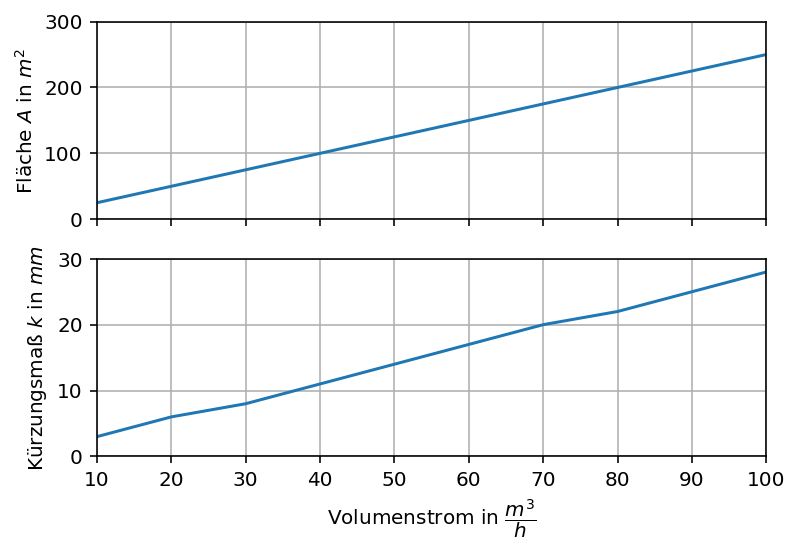

In [6]:
fig,ax = plt.subplots(nrows=2,sharex=True)

ax[0].plot(dV_tuer,A_tuer)
ax[1].plot(dV_tuer,k_tuer)

ax[0].set(ylim=(0,300),xlim=(10,100),ylabel='Fläche $A$ in $m^2$')
ax[1].set(ylim=(0,30),xlim=(10,100),ylabel='Kürzungsmaß $k$ in $mm$',xlabel='Volumenstrom in $\dfrac{m^3}{h}$')

[a.grid() for a in ax]